In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold_prices = pd.read_csv('gold_price_china.csv')
economic_data = pd.read_csv('china-inflation(1).csv')

In [3]:
gold_prices.shape


(54, 8)

In [4]:
gold_prices.head()

,Date,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change
0,31-12-1969,41.10,41.80,43.75,35.00,8.75,35.21,-0.161
1,31-12-1970,35.96,35.13,39.19,34.78,4.41,37.38,0.062
2,31-12-1971,40.80,37.33,43.90,37.33,6.57,43.50,0.164
3,31-12-1972,58.17,43.73,70.00,43.73,26.27,64.70,0.487
4,31-12-1973,97.12,64.99,127.00,64.10,62.90,112.25,0.735


In [5]:
gold_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   54 non-null     object 
 1   Average Closing Price  54 non-null     float64
 2   Year Open              54 non-null     float64
 3   Year High              54 non-null     float64
 4   Year Low               54 non-null     float64
 5   Year Range Price       54 non-null     float64
 6   Year Close             54 non-null     float64
 7   Annual % Change        54 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


In [6]:
gold_prices.describe()

,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,614.832407,597.865370,703.203519,544.099259,159.104259,630.736852,0.100944
std,522.134252,507.545973,585.269833,469.351612,144.733256,532.327723,0.269706
min,35.960000,35.130000,39.190000,34.780000,4.410000,35.210000,-0.322000
25%,297.342500,283.462500,329.512500,266.200000,55.100000,289.612500,-0.039500
50%,383.900000,397.000000,432.075000,363.200000,96.875000,395.500000,0.057500
75%,948.337500,862.500000,1169.562500,782.875000,244.925000,1011.400000,0.211500
max,1864.110000,1946.600000,2058.400000,1785.920000,586.050000,1985.000000,1.334000


In [7]:
economic_data.shape

(63, 11)

In [8]:
economic_data.tail()

,Date,Inflation Rate,Annual Change,Unemployment Rate,Annual Change.1,GDP,Per Capita (US $),Annual % Change,Tariff Rate,Weighted Mean,Interest Rate
58,31-12-2018,2.0748,0.48,4.31,-0.16,13894.90786,9905.4064,6.7498,3.39,-0.44,1.5
59,31-12-2019,2.8992,0.82,4.56,0.25,14279.96851,10143.8602,5.9505,2.53,-0.86,1.5
60,31-12-2020,2.4194,-0.48,5.00,0.44,14687.74416,10408.7196,2.2386,2.47,-0.06,1.5
61,31-12-2021,0.9810,-1.44,4.55,-0.45,17820.45951,12617.5051,8.4485,2.31,-0.16,1.5
62,31-12-2022,1.9736,0.99,4.98,0.43,17963.17148,12720.2163,2.9891,0.00,-2.31,1.5


In [9]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               63 non-null     object 
 1   Inflation Rate     63 non-null     float64
 2   Annual Change      63 non-null     float64
 3   Unemployment Rate  63 non-null     float64
 4   Annual Change.1    63 non-null     float64
 5   GDP                63 non-null     float64
 6   Per Capita (US $)  63 non-null     float64
 7   Annual % Change    63 non-null     float64
 8   Tariff Rate        63 non-null     float64
 9    Weighted Mean     63 non-null     float64
 10  Interest Rate      63 non-null     float64
dtypes: float64(10), object(1)
memory usage: 5.5+ KB


In [10]:
economic_data.describe()

,Inflation Rate,Annual Change,Unemployment Rate,Annual Change.1,GDP,Per Capita (US $),Annual % Change,Tariff Rate,Weighted Mean,Interest Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000
mean,2.787838,0.031111,2.049524,0.079048,3080.293192,2274.951757,7.864798,4.213333,1.057355e-16,3.386508
std,5.176964,3.743370,2.110057,0.331899,4943.581282,3513.465584,6.742574,7.530040,6.150250e+00,3.537579
min,-1.401500,-15.190000,0.000000,-0.450000,47.209186,70.909200,-27.270000,0.000000,-2.793000e+01,0.000000
25%,0.000000,-0.270000,0.000000,0.000000,158.684398,171.871950,6.898000,0.000000,-5.250000e-01,0.000000
50%,0.719100,0.000000,2.370000,0.000000,456.289122,407.892700,8.720000,0.000000,0.000000e+00,2.250000
75%,2.975750,0.490000,4.480000,0.030000,3151.223230,2396.589050,10.862100,4.695000,0.000000e+00,5.760000
max,24.257000,11.580000,5.000000,2.370000,17963.171480,12720.216300,19.300000,32.170000,3.217000e+01,11.340000


In [11]:
data = pd.merge(gold_prices, economic_data, on='Date',how='left')

In [12]:
data.tail(10)

,Date,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change_x,Inflation Rate,Annual Change,Unemployment Rate,Annual Change.1,GDP,Per Capita (US $),Annual % Change_y,Tariff Rate,Weighted Mean,Interest Rate
44,31-12-2013,1409.51,1681.50,1692.50,1192.75,499.75,1201.50,-0.278,2.6211,0.00,4.60,0.02,9570.471112,7020.3861,7.7662,0.00,0.00,3.00
45,31-12-2014,1266.06,1219.75,1379.00,1144.50,234.50,1199.25,-0.002,1.9216,-0.70,4.63,0.03,10475.624940,7636.0743,7.4258,4.74,4.74,3.00
46,31-12-2015,1158.86,1184.25,1298.00,1049.60,248.40,1060.20,-0.116,1.4370,-0.48,4.65,0.02,11061.572620,8016.4456,7.0413,4.52,-0.22,2.75
47,31-12-2016,1251.92,1075.20,1372.60,1073.60,299.00,1151.70,0.086,2.0000,0.56,4.56,-0.09,11233.313730,8094.3902,6.8488,3.54,-0.98,1.50
48,31-12-2017,1260.39,1162.00,1351.20,1162.00,189.20,1296.50,0.126,1.5931,-0.41,4.47,-0.09,12310.491330,8817.0456,6.9472,3.83,0.29,1.50
49,31-12-2018,1268.93,1312.80,1360.25,1176.70,183.55,1281.65,-0.012,2.0748,0.48,4.31,-0.16,13894.907860,9905.4064,6.7498,3.39,-0.44,1.50
50,31-12-2019,1393.34,1287.20,1542.60,1270.05,272.55,1523.00,0.188,2.8992,0.82,4.56,0.25,14279.968510,10143.8602,5.9505,2.53,-0.86,1.50
51,31-12-2020,1773.73,1520.55,2058.40,1472.35,586.05,1895.10,0.244,2.4194,-0.48,5.00,0.44,14687.744160,10408.7196,2.2386,2.47,-0.06,1.50
52,31-12-2021,1798.89,1946.60,1954.40,1678.00,276.40,1828.60,-0.035,0.9810,-1.44,4.55,-0.45,17820.459510,12617.5051,8.4485,2.31,-0.16,1.50
53,31-12-2022,1864.11,1800.10,2043.30,1785.92,257.38,1985.00,0.086,1.9736,0.99,4.98,0.43,17963.171480,12720.2163,2.9891,0.00,-2.31,1.50


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   54 non-null     object 
 1   Average Closing Price  54 non-null     float64
 2   Year Open              54 non-null     float64
 3   Year High              54 non-null     float64
 4   Year Low               54 non-null     float64
 5   Year Range Price       54 non-null     float64
 6   Year Close             54 non-null     float64
 7   Annual % Change_x      54 non-null     float64
 8   Inflation Rate         54 non-null     float64
 9   Annual Change          54 non-null     float64
 10  Unemployment Rate      54 non-null     float64
 11  Annual Change.1        54 non-null     float64
 12  GDP                    54 non-null     float64
 13  Per Capita (US $)      54 non-null     float64
 14  Annual % Change_y      54 non-null     float64
 15  Tariff R

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\SEC\AppData\Local\Temp\ipykernel_2908\1453708669.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
data.sort_values('Date', inplace=True)

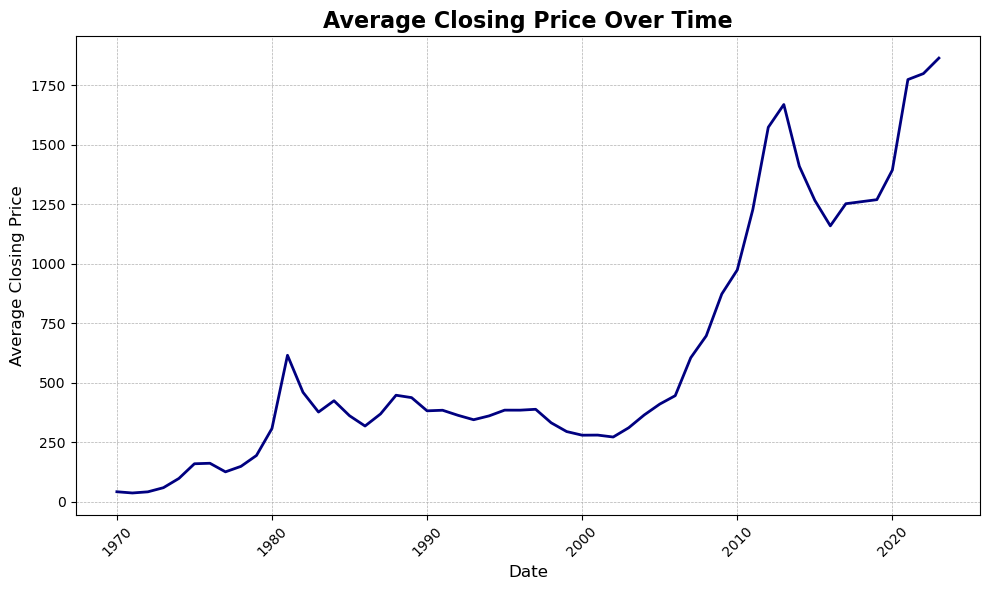

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the average closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Average Closing Price'], color='navy', linewidth=2)

# Adding labels and title
plt.title('Average Closing Price Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Closing Price', fontsize=12)

# Adding grid and adjusting style similar to the uploaded graph
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
correlation_matrix = data.corr()
print(correlation_matrix)

                           Date  Average Closing Price  Year Open  Year High  \
Date                   1.000000               0.846637   0.835868   0.831089   
Average Closing Price  0.846637               1.000000   0.988972   0.995816   
Year Open              0.835868               0.988972   1.000000   0.983010   
Year High              0.831089               0.995816   0.983010   1.000000   
Year Low               0.853362               0.996486   0.989314   0.986329   
Year Range Price       0.593400               0.795387   0.766858   0.845242   
Year Close             0.842499               0.991577   0.970174   0.989994   
Annual % Change_x     -0.166259              -0.103270  -0.179440  -0.070086   
Inflation Rate         0.076855              -0.004513   0.005237  -0.023137   
Annual Change         -0.034883              -0.001606  -0.007351   0.000412   
Unemployment Rate      0.930701               0.696709   0.679160   0.684194   
Annual Change.1        0.026278         

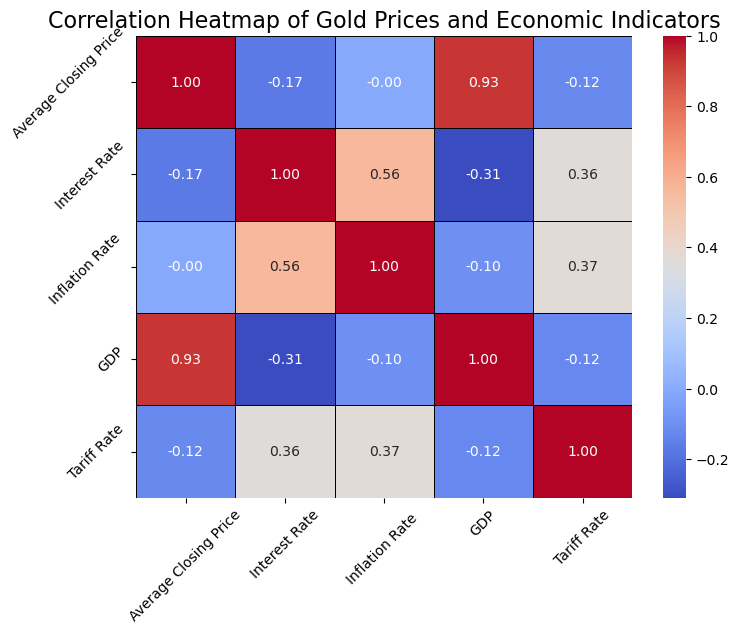

In [18]:
correlation_columns = ['Average Closing Price', 'Interest Rate', 'Inflation Rate ', 'GDP', 'Tariff Rate']

# Calculate the correlation matrix
correlation_matrix = data[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt=".2f")

# Customize plot
plt.title('Correlation Heatmap of Gold Prices and Economic Indicators', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [19]:
df = pd.DataFrame(data)

df['Interest Rate'].fillna(df['Interest Rate'].mean(), inplace=True)
df['Inflation Rate '].fillna(df['Inflation Rate '].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['Tariff Rate'].fillna(df['Tariff Rate'].mean(), inplace=True)

label_encoder = LabelEncoder()
df['Interest Rate'] = label_encoder.fit_transform(df['Interest Rate'])

scaler = StandardScaler()
data[['Interest Rate', 'Inflation Rate ', 'GDP', 'Tariff Rate']] = scaler.fit_transform(
    data[['Interest Rate', 'Inflation Rate ', 'GDP', 'Tariff Rate']])

# Select features and target
features = ['Interest Rate', 'Inflation Rate ', 'GDP', 'Tariff Rate']
X = data[features]
y = data['Average Closing Price']

In [20]:
print(X.isnull().sum())

Interest Rate      0
Inflation Rate     0
GDP                0
Tariff Rate        0
dtype: int64


In [21]:
print(y.isnull().sum())

0


In [22]:
features = ['Interest Rate','Inflation Rate ','GDP','Tariff Rate'] 
X = df[features]
y = df['Average Closing Price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [25]:
model_metrics = {}
predicted_values = {}

In [26]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_metrics[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
    predicted_values[model_name] = y_pred
    
    print(f"\n{model_name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print(f"Predicted Values: {y_pred}")


Random Forest:
Mean Absolute Error: 72.51324545454514
Mean Squared Error: 8755.471186797178
Root Mean Squared Error: 93.57067482281603
R-squared: 0.9730768323049684
Predicted Values: [ 383.6417 1350.968  1222.5887  493.0569 1615.3597  110.0403  440.6609
 1622.0881   43.1758  314.5203  404.7245]

Gradient Boosting:
Mean Absolute Error: 64.82757578780014
Mean Squared Error: 8771.991482375104
Root Mean Squared Error: 93.65891032024184
R-squared: 0.9730260322190876
Predicted Values: [ 388.63548405 1260.623325   1166.35618338  555.75202373 1668.70204892
   98.04247266  413.68532112 1755.56391418   41.96054942  289.26292659
  353.08705802]

Decision Tree:
Mean Absolute Error: 86.49090909090906
Mean Squared Error: 12190.82032727272
Root Mean Squared Error: 110.412047926269
R-squared: 0.9625130968957906
Predicted Values: [ 381.27 1393.34 1158.86  614.75 1668.86   97.12  423.71 1864.11   40.8
  278.86  423.71]

K-Nearest Neighbors:
Mean Absolute Error: 75.77090909090907
Mean Squared Error: 120

In [27]:
metrics_df = pd.DataFrame(model_metrics).T

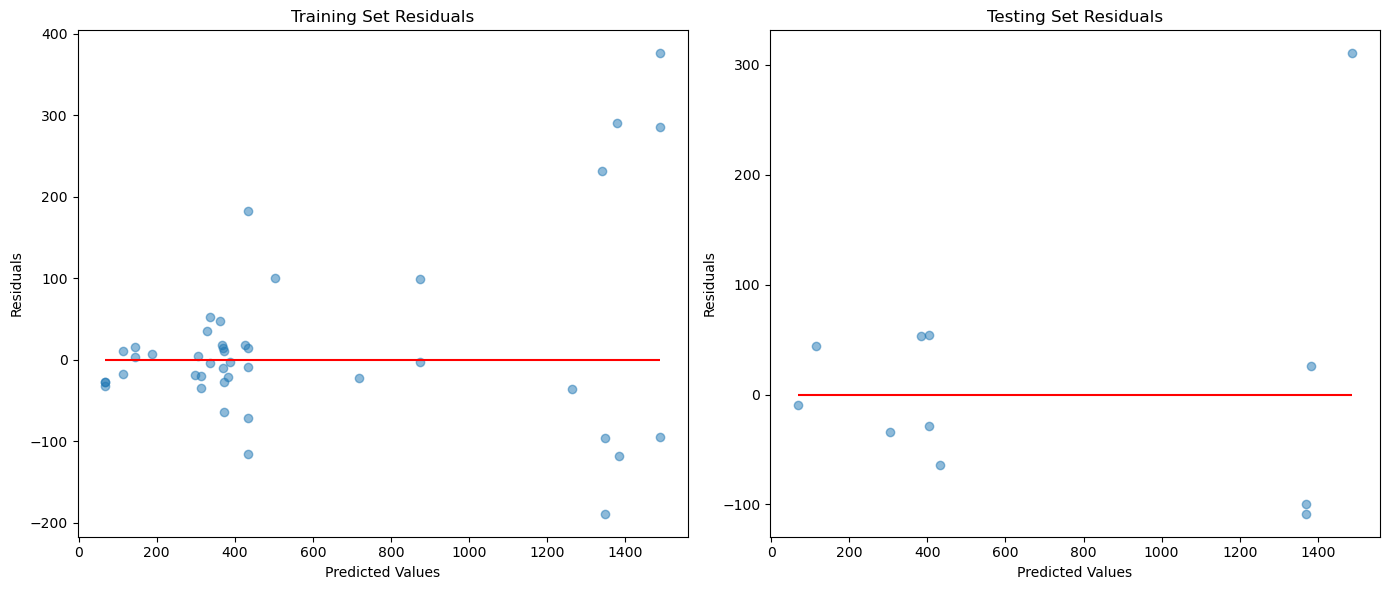

In [28]:
# Assuming X_train, y_train, X_test, y_test are defined and your model is already trained

# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate residuals (actual - predicted)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting the residuals for training and testing sets
plt.figure(figsize=(14, 6))

# Training set residuals
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Set Residuals')

# Testing set residuals
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Testing Set Residuals')

plt.tight_layout()
plt.show()

In [29]:
metrics_df = pd.DataFrame(model_metrics).T

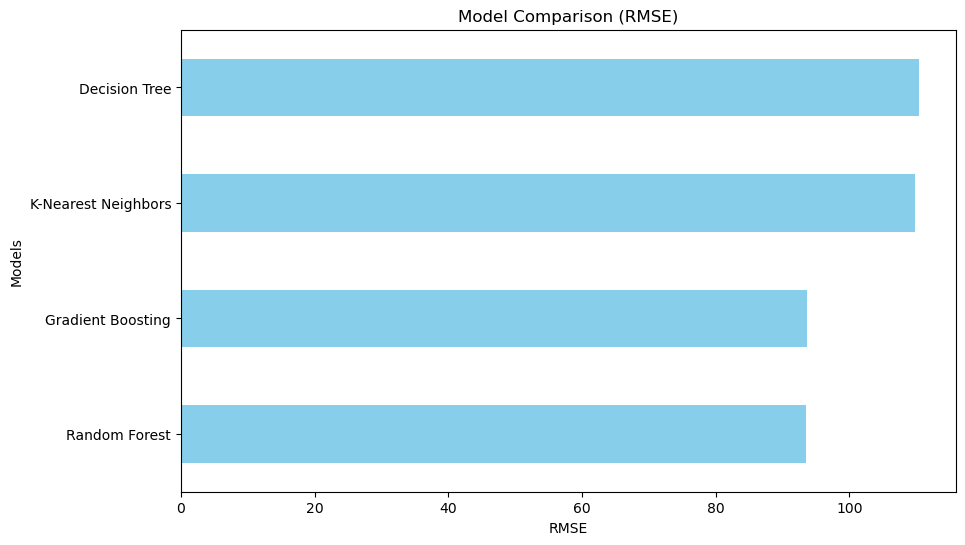

In [30]:
plt.figure(figsize=(10, 6))
metrics_df['RMSE'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Model Comparison (RMSE)')
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.show()

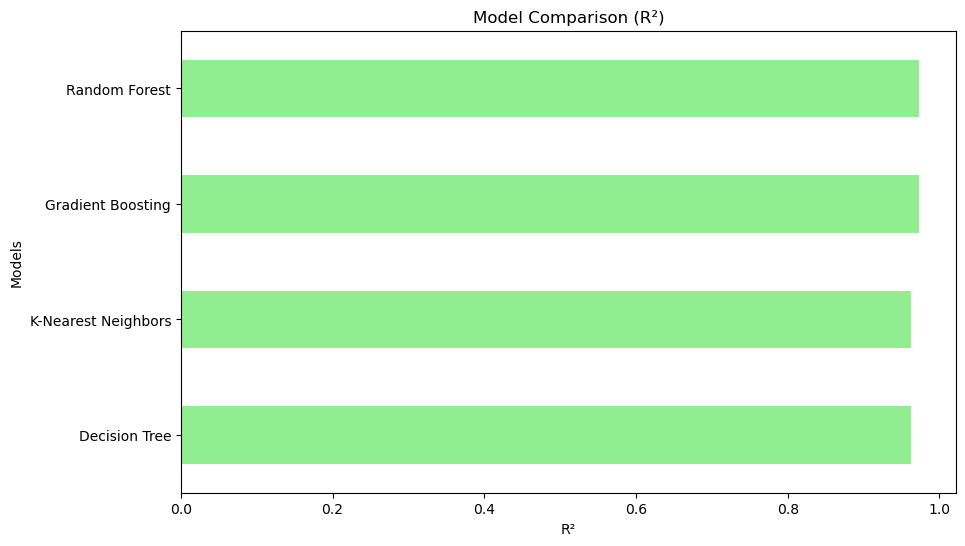

In [31]:
plt.figure(figsize=(10, 6))
metrics_df['R²'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Model Comparison (R²)')
plt.xlabel('R²')
plt.ylabel('Models')
plt.show()


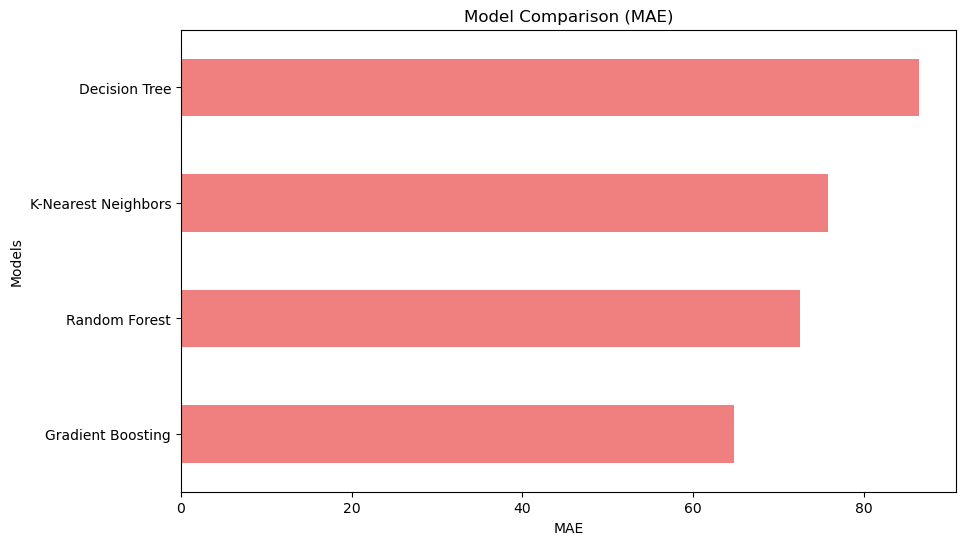

In [32]:
plt.figure(figsize=(10, 6))
metrics_df['MAE'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Model Comparison (MAE)')
plt.xlabel('MAE')
plt.ylabel('Models')
plt.show()

In [33]:
future_Inflation_Rate = 2
future_Interest_Rate = 5
future_GDP = 17967
future_Applied = 2.3
future_economic_data = np.array([[future_Inflation_Rate, future_Interest_Rate, future_GDP, future_Applied]])
future_economic_data_scaled = scaler.transform(future_economic_data)

C:\Users\SEC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
for model_name, model in models.items():
    future_gold_price = model.predict(future_economic_data_scaled)
    print(f'Predicted Gold Price using {model_name}: {future_gold_price[0]}')

Predicted Gold Price using Random Forest: 40.77999999999998
Predicted Gold Price using Gradient Boosting: 39.1485588578895
Predicted Gold Price using Decision Tree: 41.1
Predicted Gold Price using K-Nearest Neighbors: 67.956


C:\Users\SEC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\SEC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\SEC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\SEC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


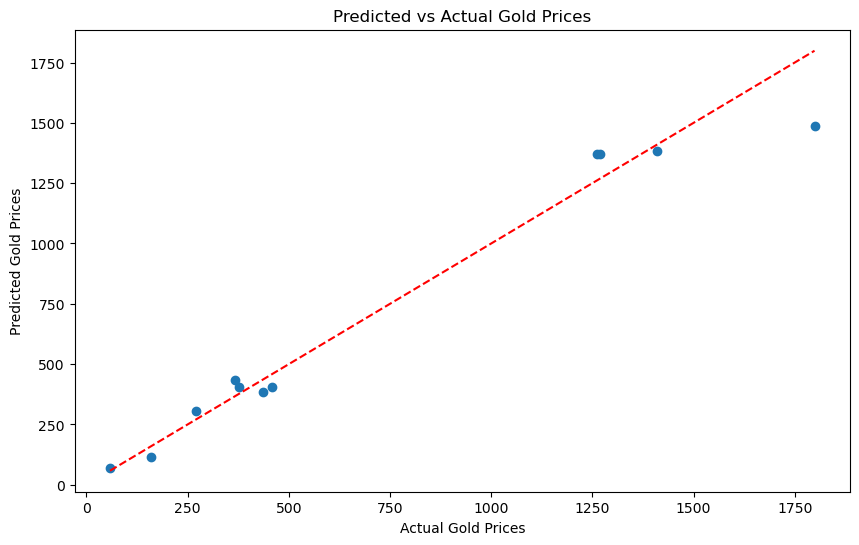

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Gold Prices')
plt.ylabel('Predicted Gold Prices')
plt.title('Predicted vs Actual Gold Prices')
plt.show()